# A look At The US Covid Data

### Importing Necessary libraries

In [48]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=(12,8)

In [3]:
df = pd.read_csv(r"D:\Projects\Covid\covid_data.csv")

In [4]:
df.head()

,USA State,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
0,Alabama,1659936,21138,1623935.0,14863.0,338542,4311,9332317,1903317,4903185
1,Alaska,301513,1485,298902.0,1126.0,412159,2030,4790640,6548661,731545
2,Arizona,2508168,33749,2461333.0,13086.0,344589,4637,22489035,3089698,7278717
3,Arkansas,1029976,13246,1012777.0,3953.0,341300,4389,8036831,2663139,3017804
4,California,12393361,104634,12227662.0,61065.0,313659,2648,202799362,5132573,39512223


In [5]:
df.tail()

,USA State,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
45,Virginia,2315784,23748,2289616.0,2420.0,271311,2782,19172533,2246206,8535519
46,Washington,1989477,16151,1960007.0,13319.0,261261,2121,18887049,2480278,7614893
47,West Virginia,657760,8188,644461.0,5111.0,367023,4569,7291246,4068442,1792147
48,Wisconsin,2043838,16758,2020642.0,6438.0,351028,2878,19643258,3373719,5822434
49,Wyoming,188851,2048,186326.0,477.0,326303,3539,1572010,2716174,578759


In [8]:
df.columns

Index(['USA State', 'Total Cases', 'Total Deaths', 'Total Recovered',
       'Active Cases', 'Tot Cases/ 1M pop', 'Deaths/ 1M pop', 'Total Tests',
       'Tests/ 1M pop', 'Population'],
      dtype='object')

In [9]:
df.dtypes

USA State             object
Total Cases            int64
Total Deaths           int64
Total Recovered      float64
Active Cases         float64
Tot Cases/ 1M pop      int64
Deaths/ 1M pop         int64
Total Tests            int64
Tests/ 1M pop          int64
Population             int64
dtype: object

In [10]:
df.describe()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
count,5.000000e+01,50.000000,4.500000e+01,45.000000,50.0000,50.000000,5.000000e+01,5.000000e+01,5.000000e+01
mean,2.099555e+06,22770.580000,2.078133e+06,13326.422222,321633.3200,3403.980000,2.334829e+07,3.426067e+06,6.550675e+06
std,2.380548e+06,24439.304847,2.424155e+06,19472.358374,43011.9253,854.845671,3.452085e+07,1.522581e+06,7.389282e+06
min,1.540090e+05,929.000000,1.530110e+05,0.000000,230619.0000,1419.000000,1.026007e+06,1.053651e+06,5.787590e+05
25%,5.952392e+05,5434.000000,6.444610e+05,1898.000000,295795.7500,2773.750000,6.020897e+06,2.495598e+06,1.827712e+06
50%,1.527093e+06,15789.500000,1.371142e+06,6180.000000,324968.5000,3547.500000,1.415374e+07,2.949936e+06,4.558234e+06
75%,2.460072e+06,28462.250000,2.289616e+06,14863.000000,345628.7500,4077.000000,2.467828e+07,4.071986e+06,7.530849e+06
max,1.239336e+07,104634.000000,1.222766e+07,99077.000000,418935.0000,4637.000000,2.027994e+08,8.314785e+06,3.951222e+07


In [12]:
df.isna().sum()

USA State            0
Total Cases          0
Total Deaths         0
Total Recovered      5
Active Cases         5
Tot Cases/ 1M pop    0
Deaths/ 1M pop       0
Total Tests          0
Tests/ 1M pop        0
Population           0
dtype: int64

In [14]:
df.fillna(0, inplace = True)

In [ ]:
# Making the States be our indices
df.set_index('USA State', inplace = True)

In [18]:
df.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population
USA State,,,,,,,,,
Alabama,1659936,21138,1623935.0,14863.0,338542,4311,9332317,1903317,4903185
Alaska,301513,1485,298902.0,1126.0,412159,2030,4790640,6548661,731545
Arizona,2508168,33749,2461333.0,13086.0,344589,4637,22489035,3089698,7278717
Arkansas,1029976,13246,1012777.0,3953.0,341300,4389,8036831,2663139,3017804
California,12393361,104634,12227662.0,61065.0,313659,2648,202799362,5132573,39512223


## Now Let's Answer Some Questions
### Q1. Which states have the highest and lowest case fatality rates?

In [26]:
df["case_fatality_rate"] = df["Total Deaths"]/df['Total Cases']

In [28]:
df[df["case_fatality_rate"]==max(df["case_fatality_rate"])]

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate
USA State,,,,,,,,,,
Pennsylvania,3565499,51480,0.0,0.0,278511,4021,30962562,2418574,12801989,0.014438


In [29]:
df[df["case_fatality_rate"]==min(df["case_fatality_rate"])]

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate
USA State,,,,,,,,,,
Utah,1106483,5418,1096422.0,4643.0,345133,1690,9406861,2934181,3205958,0.004897


In [ ]:
# Option 2: sort values by case_fatality_rate in Descending order
cfr_sorted = df.sort_values(by="case_fatality_rate", ascending = False)

In [34]:
cfr_sorted.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate
USA State,,,,,,,,,,
Pennsylvania,3565499,51480,0.0,0.0,278511,4021,30962562,2418574,12801989,0.014438
Michigan,3142827,43284,3082734.0,16809.0,314696,4334,28943982,2898207,9986857,0.013772
Georgia,3157491,43095,3075283.0,39113.0,297388,4059,28915980,2723446,10617423,0.013648
New Mexico,681525,9236,660313.0,11976.0,325027,4405,8610078,4106238,2096829,0.013552
Mississippi,1000415,13474,984056.0,2885.0,336144,4527,7063623,2373410,2976149,0.013468


In [35]:
cfr_sorted.tail()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate
USA State,,,,,,,,,,
New Hampshire,382013,3099,0.0,0.0,280952,2279,4845153,3563370,1359711,0.008112
Vermont,154009,929,153011.0,69.0,246814,1489,4184358,6705820,623989,0.006032
Hawaii,401852,2009,395053.0,4790.0,283819,1419,4101166,2896566,1415872,0.004999
Alaska,301513,1485,298902.0,1126.0,412159,2030,4790640,6548661,731545,0.004925
Utah,1106483,5418,1096422.0,4643.0,345133,1690,9406861,2934181,3205958,0.004897


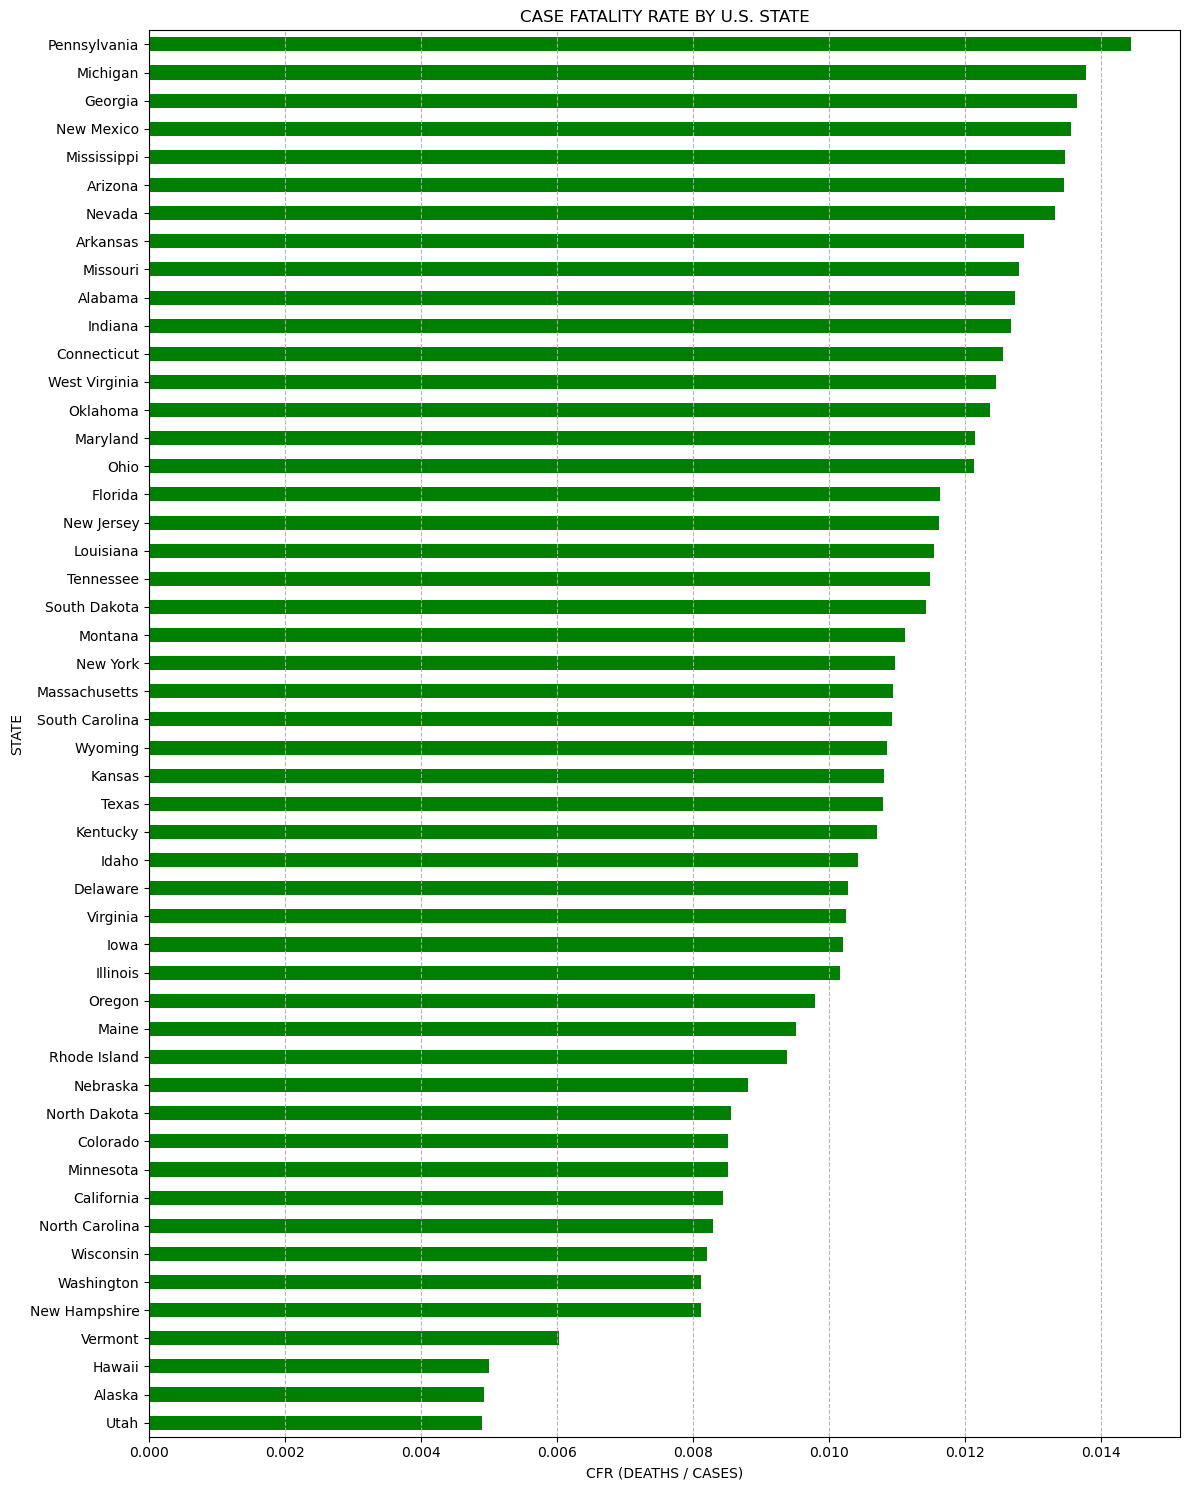

In [41]:
# For visualization purposes:
plt.figure(figsize=(12, 15))  # Increase height to fit all labels
cfr_sorted['case_fatality_rate'].plot(kind='barh', color='green')
plt.title('CASE FATALITY RATE BY U.S. STATE')
plt.xlabel('CFR (DEATHS / CASES)')
plt.ylabel('STATE')
plt.grid(axis='x', linestyle='--', alpha=0.9)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#### From the above analysis it is clear that Pennsylvania had the highest CFR cases while Utah had the least.

## Q2. Is there a correlation between testing rate and total cases per million?

In [42]:
df.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate
USA State,,,,,,,,,,
Alabama,1659936,21138,1623935.0,14863.0,338542,4311,9332317,1903317,4903185,0.012734
Alaska,301513,1485,298902.0,1126.0,412159,2030,4790640,6548661,731545,0.004925
Arizona,2508168,33749,2461333.0,13086.0,344589,4637,22489035,3089698,7278717,0.013456
Arkansas,1029976,13246,1012777.0,3953.0,341300,4389,8036831,2663139,3017804,0.012860
California,12393361,104634,12227662.0,61065.0,313659,2648,202799362,5132573,39512223,0.008443


In [ ]:
# Let's do the Pearson correlation 
correlation = df["Tests/ 1M pop"].corr(df["Tot Cases/ 1M pop"])

In [ ]:
# Pearson coefficient
correlation

0.2052335814857544

<Figure size 1000x600 with 0 Axes>

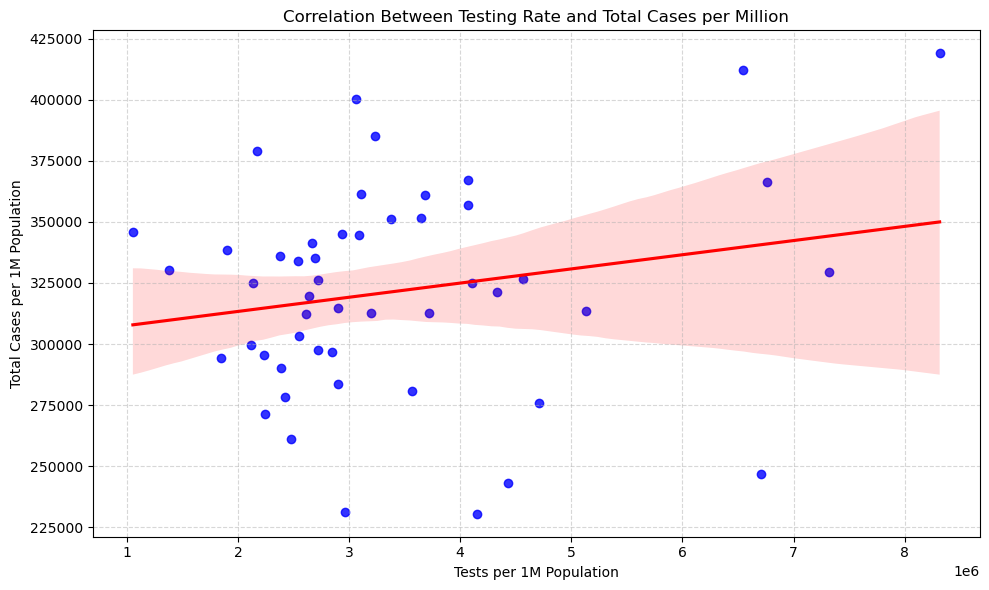

In [50]:
# A scatter plot to viausualize the trend
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Tests/ 1M pop', y='Tot Cases/ 1M pop', scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Correlation Between Testing Rate and Total Cases per Million')
plt.xlabel('Tests per 1M Population')
plt.ylabel('Total Cases per 1M Population')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### A correlation value of 0.2 suggests a weak positive linear relationship between testing rate per million and total cases per million. this means that testing more is slightly associated with having more cases per million but the relationship is not strong.

## Q3. How do active case rates compare across states when adjusted for population size?

In [51]:
# Create an active_case_rate and  active_case_rate/1M columns for adaptability
df["active_case_rate"] = df["Active Cases"]/df["Tot Cases/ 1M pop"]
df["active_case_rate/1M"] = df["active_case_rate"]  * 1000000

In [52]:
df.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate,active_case_rate,active_case_rate/1M
USA State,,,,,,,,,,,,
Alabama,1659936,21138,1623935.0,14863.0,338542,4311,9332317,1903317,4903185,0.012734,0.043903,43902.972157
Alaska,301513,1485,298902.0,1126.0,412159,2030,4790640,6548661,731545,0.004925,0.002732,2731.955386
Arizona,2508168,33749,2461333.0,13086.0,344589,4637,22489035,3089698,7278717,0.013456,0.037976,37975.675370
Arkansas,1029976,13246,1012777.0,3953.0,341300,4389,8036831,2663139,3017804,0.012860,0.011582,11582.185760
California,12393361,104634,12227662.0,61065.0,313659,2648,202799362,5132573,39512223,0.008443,0.194686,194685.948753


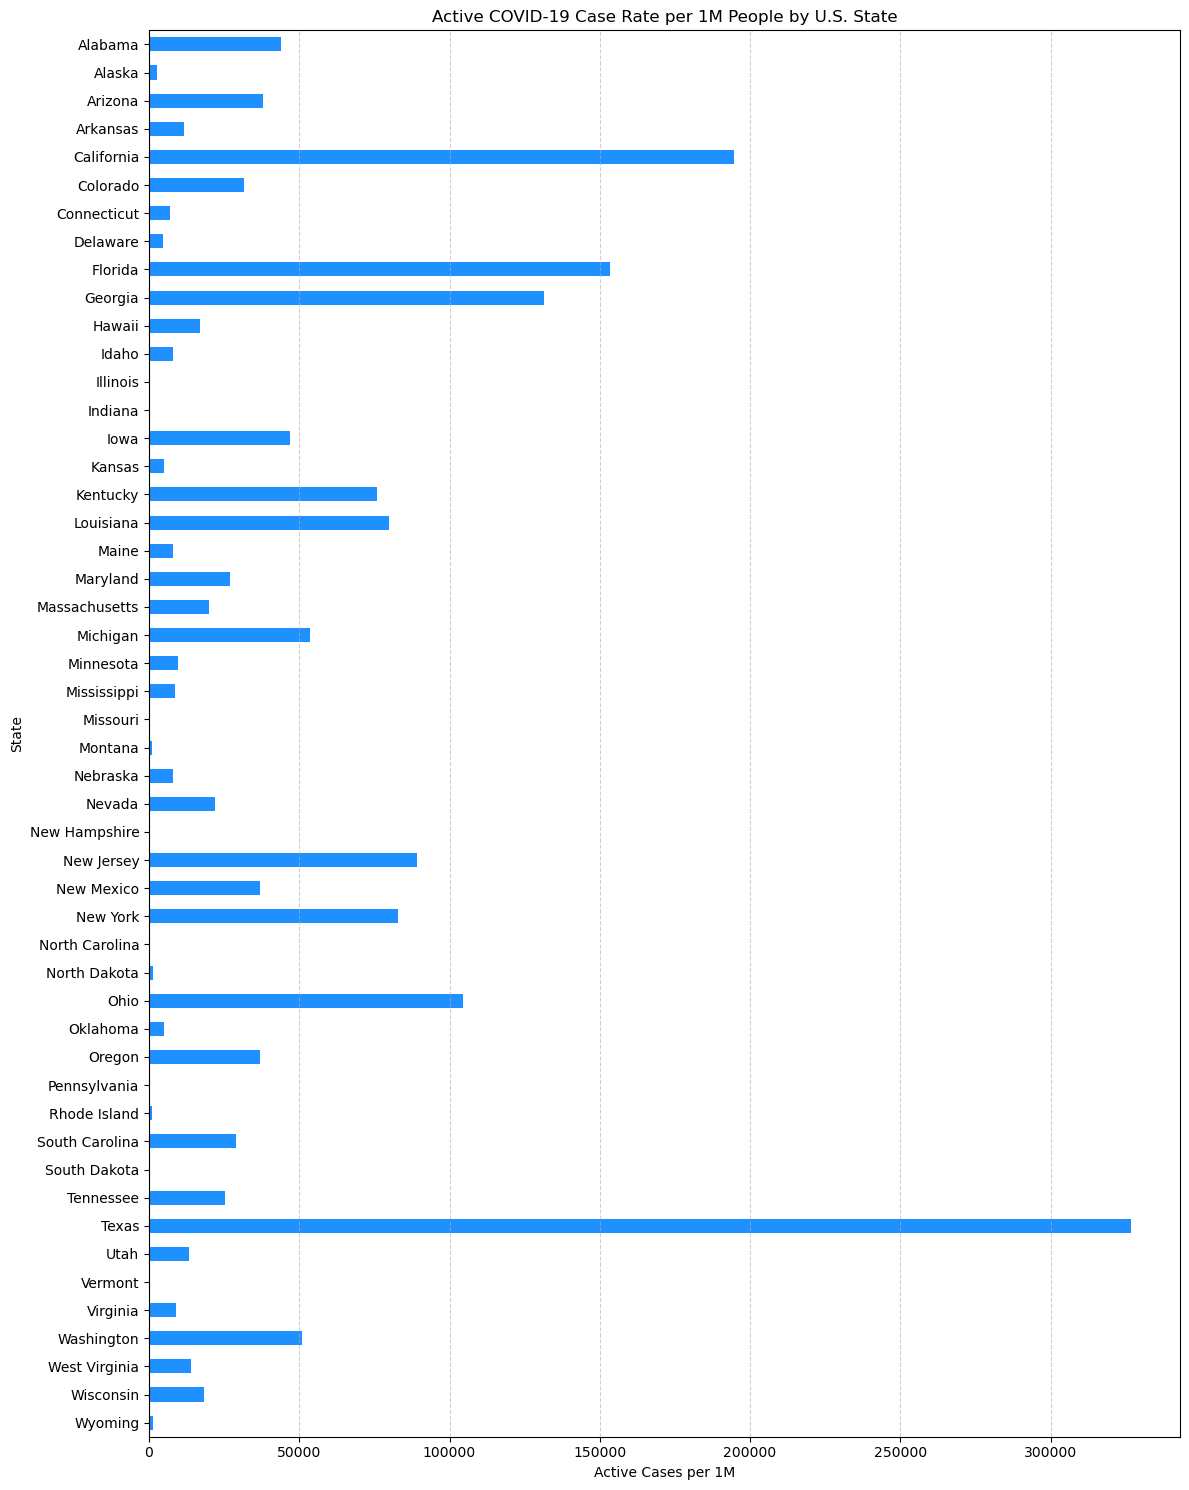

In [53]:
# Horizontal bar chart for visualization
plt.figure(figsize=(12, 15))
df['active_case_rate/1M'].plot(kind='barh', color='dodgerblue')
plt.title('Active COVID-19 Case Rate per 1M People by U.S. State')
plt.xlabel('Active Cases per 1M')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [57]:
# Create a state abbreviation map
us_state_abbrev = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
    'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA',
    'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA',
    'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH',
    'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC',
    'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA',
    'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN',
    'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
    'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY'
}

# Add state abbreviations to your DataFrame
df['State Abbrev'] = df.index.map(us_state_abbrev)

In [62]:
# We can also use a Choropleth map to show this
import plotly.express as px

fig = px.choropleth(
    df,
    locations='State Abbrev',
    locationmode='USA-states',
    color='active_case_rate/1M',
    scope='usa',
    color_continuous_scale='Reds',
    title='Active COVID-19 Cases per 1M People by U.S. State',
    labels={'active_case_rate/1M': 'Active Cases / 1M'}
)

fig.update_layout(geo=dict(bgcolor='black'), 
                  title_x=0.5,
                  width = 1200,
                  height = 900)
fig.show()


## Q4. Which states have the highest death-to-case ratio?

In [65]:
# Let's create death_case_ratio(%) column 
df["death_case_ratio(%)"] = (df["Total Deaths"] / df["Total Cases"]) * 100

In [66]:
df.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate,active_case_rate,active_case_rate/1M,State Abbrev,death_case_ratio(%)
USA State,,,,,,,,,,,,,,
Alabama,1659936,21138,1623935.0,14863.0,338542,4311,9332317,1903317,4903185,0.012734,0.043903,43902.972157,AL,1.273423
Alaska,301513,1485,298902.0,1126.0,412159,2030,4790640,6548661,731545,0.004925,0.002732,2731.955386,AK,0.492516
Arizona,2508168,33749,2461333.0,13086.0,344589,4637,22489035,3089698,7278717,0.013456,0.037976,37975.675370,AZ,1.345564
Arkansas,1029976,13246,1012777.0,3953.0,341300,4389,8036831,2663139,3017804,0.012860,0.011582,11582.185760,AR,1.286049
California,12393361,104634,12227662.0,61065.0,313659,2648,202799362,5132573,39512223,0.008443,0.194686,194685.948753,CA,0.844275


In [67]:
# Sorting values by our new col to view the answer to our question
df_sorted = df.sort_values(by = "death_case_ratio(%)", ascending = False)
df_sorted.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate,active_case_rate,active_case_rate/1M,State Abbrev,death_case_ratio(%)
USA State,,,,,,,,,,,,,,
Pennsylvania,3565499,51480,0.0,0.0,278511,4021,30962562,2418574,12801989,0.014438,0.000000,0.000000,PA,1.443837
Michigan,3142827,43284,3082734.0,16809.0,314696,4334,28943982,2898207,9986857,0.013772,0.053413,53413.452983,MI,1.377231
Georgia,3157491,43095,3075283.0,39113.0,297388,4059,28915980,2723446,10617423,0.013648,0.131522,131521.782991,GA,1.364849
New Mexico,681525,9236,660313.0,11976.0,325027,4405,8610078,4106238,2096829,0.013552,0.036846,36846.169703,NM,1.355196
Mississippi,1000415,13474,984056.0,2885.0,336144,4527,7063623,2373410,2976149,0.013468,0.008583,8582.631253,MS,1.346841


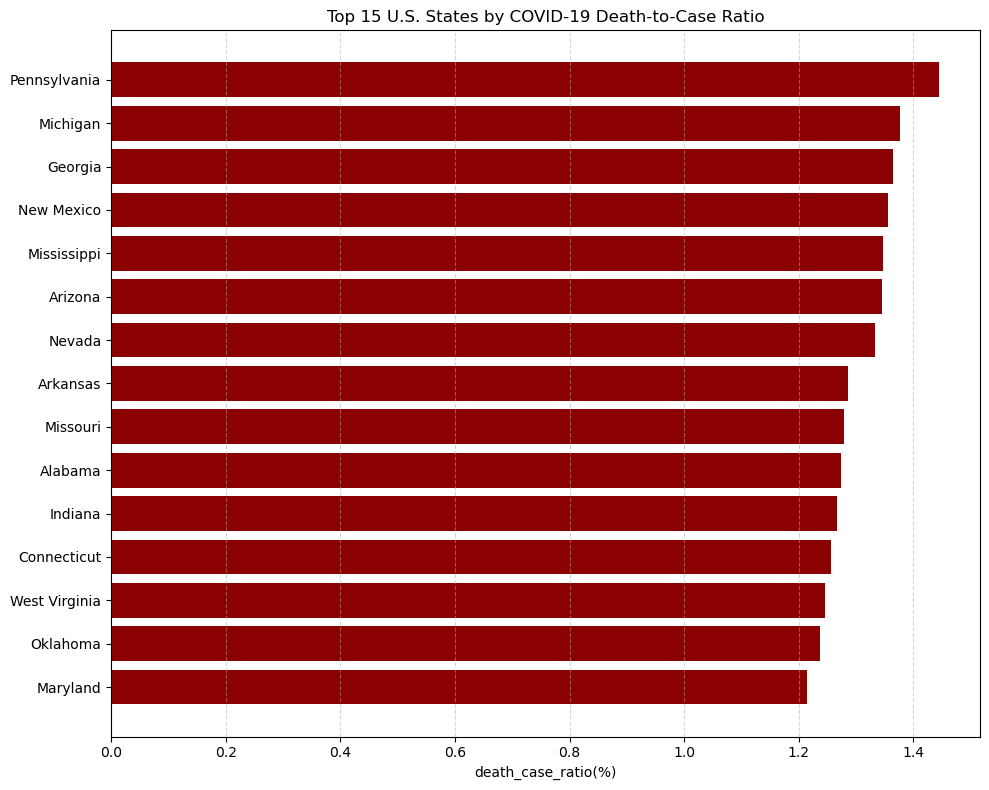

In [ ]:
# Horizontal bar chart displaying the top 15 states in line with our question
top_states = df_sorted.head(15)

plt.figure(figsize=(10, 8))
plt.barh(top_states.index, top_states['death_case_ratio(%)'], color='darkred')
plt.xlabel('death_case_ratio(%)')
plt.title('Top 15 U.S. States by COVID-19 Death-to-Case Ratio')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [69]:
fig = px.choropleth(
    df,
    locations='State Abbrev',
    locationmode='USA-states',
    color='death_case_ratio(%)',
    scope='usa',
    color_continuous_scale='OrRd',
    title='COVID-19 Death-to-Case Ratio (%) by U.S. State',
    labels={'death_case_ratio(%)': 'Death-to-Case %'}
)

fig.update_layout(geo=dict(bgcolor='black'), title_x=0.5, width=1200, height=800)
fig.show()


#### From the above analysis we can clearly extract and visualize States with the highest Death to Cases Ratio. Top five states include: 'Pennsylvania', 'Michigan', 'Georgia', 'New Mexico' and 'Mississippi' respectively.

## Q5. Are states with higher testing rates seeing lower death rates?

In [73]:
# This a correlation analysis question between 'Tests/ 1M pop' and 'Deaths/ 1M pop'
correlation1 = df["Tests/ 1M pop"].corr(df["Deaths/ 1M pop"])

In [74]:
# Correlation Coeff
correlation1

-0.17900415360532296

#### The negative coefficient proves that indeed higher testing rates are associated with lower death rates.

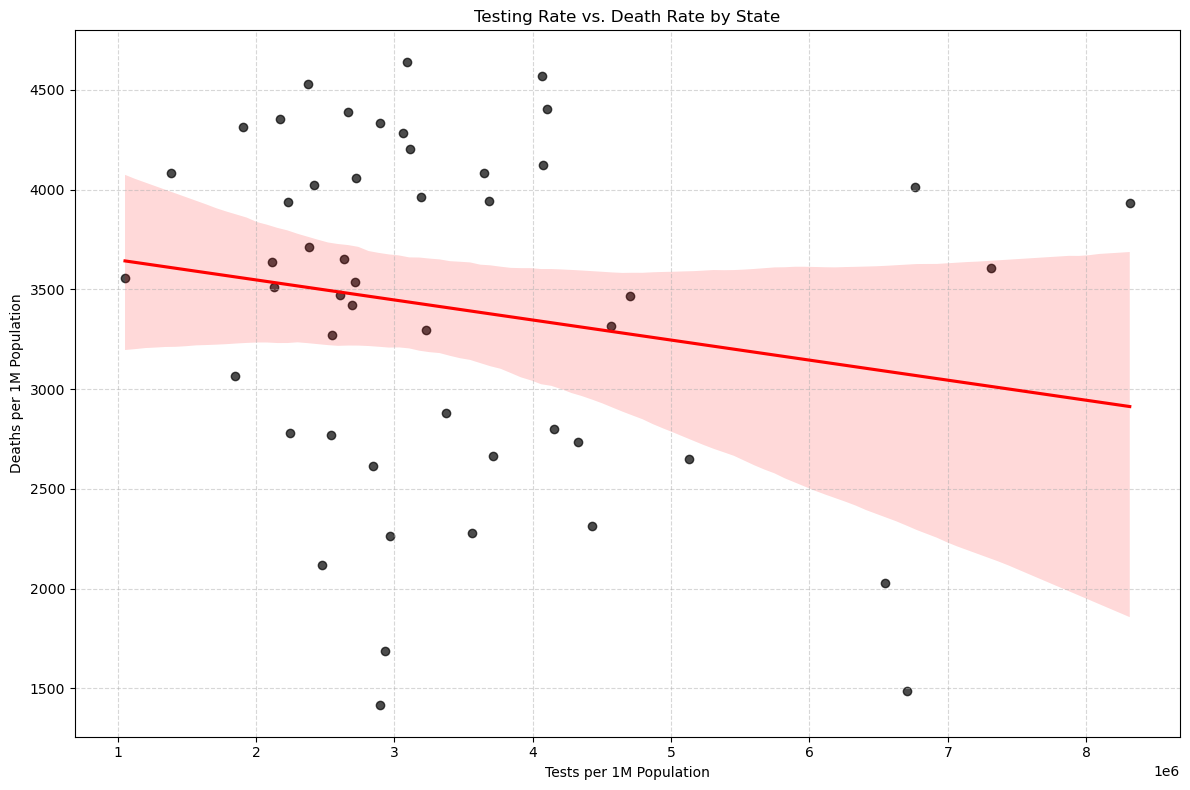

In [77]:
# Let's try visualizing it in a scatter plot with regression line
sns.regplot(
    data=df,
    x='Tests/ 1M pop',
    y='Deaths/ 1M pop',
    color="black",
    scatter_kws={'alpha': 0.7},
    line_kws={'color': 'red'}
)

plt.title('Testing Rate vs. Death Rate by State')
plt.xlabel('Tests per 1M Population')
plt.ylabel('Deaths per 1M Population')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### The downward slope of the trend line implies an inverse correlation - as testing rates increase, death rates drop.

## Q6. Which states have the lowest recovery rates?

In [78]:
#Let's add to our df a percentage Recovery Rate column
df["Recovery Rate %"] = (df["Total Recovered"] / df["Total Cases"]) * 100
df.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate,active_case_rate,active_case_rate/1M,State Abbrev,death_case_ratio(%),Recovery Rate %
USA State,,,,,,,,,,,,,,,
Alabama,1659936,21138,1623935.0,14863.0,338542,4311,9332317,1903317,4903185,0.012734,0.043903,43902.972157,AL,1.273423,97.831181
Alaska,301513,1485,298902.0,1126.0,412159,2030,4790640,6548661,731545,0.004925,0.002732,2731.955386,AK,0.492516,99.134034
Arizona,2508168,33749,2461333.0,13086.0,344589,4637,22489035,3089698,7278717,0.013456,0.037976,37975.675370,AZ,1.345564,98.132701
Arkansas,1029976,13246,1012777.0,3953.0,341300,4389,8036831,2663139,3017804,0.012860,0.011582,11582.185760,AR,1.286049,98.330155
California,12393361,104634,12227662.0,61065.0,313659,2648,202799362,5132573,39512223,0.008443,0.194686,194685.948753,CA,0.844275,98.663002


In [79]:
# sort the values by Recovery Rate % in ascending order
lowest_recovery = df.sort_values(by = 'Recovery Rate %')
lowest_recovery.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate,active_case_rate,active_case_rate/1M,State Abbrev,death_case_ratio(%),Recovery Rate %
USA State,,,,,,,,,,,,,,,
North Carolina,3501404,29059,0.0,0.0,333846,2771,26656056,2541556,10488084,0.008299,0.0,0.0,NC,0.829924,0.0
New Hampshire,382013,3099,0.0,0.0,280952,2279,4845153,3563370,1359711,0.008112,0.0,0.0,NH,0.811229,0.0
Pennsylvania,3565499,51480,0.0,0.0,278511,4021,30962562,2418574,12801989,0.014438,0.0,0.0,PA,1.443837,0.0
South Dakota,282895,3231,0.0,0.0,319779,3652,2331003,2634917,884659,0.011421,0.0,0.0,SD,1.142120,0.0
Indiana,2105286,26672,0.0,0.0,312718,3962,21512168,3195405,6732219,0.012669,0.0,0.0,IN,1.266906,0.0


In [82]:
# Let's see all the States with 0% recovery rate
all_low = lowest_recovery[lowest_recovery["Recovery Rate %"]==0]
all_low.head(7)

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate,active_case_rate,active_case_rate/1M,State Abbrev,death_case_ratio(%),Recovery Rate %
USA State,,,,,,,,,,,,,,,
North Carolina,3501404,29059,0.0,0.0,333846,2771,26656056,2541556,10488084,0.008299,0.0,0.0,NC,0.829924,0.0
New Hampshire,382013,3099,0.0,0.0,280952,2279,4845153,3563370,1359711,0.008112,0.0,0.0,NH,0.811229,0.0
Pennsylvania,3565499,51480,0.0,0.0,278511,4021,30962562,2418574,12801989,0.014438,0.0,0.0,PA,1.443837,0.0
South Dakota,282895,3231,0.0,0.0,319779,3652,2331003,2634917,884659,0.011421,0.0,0.0,SD,1.142120,0.0
Indiana,2105286,26672,0.0,0.0,312718,3962,21512168,3195405,6732219,0.012669,0.0,0.0,IN,1.266906,0.0


##### From the above we can see that only five states ('North Carolina', 'New Hampshire', 'Pennsylvania', 'South Dakota' and 'Indiana') had a Zero recovery rate.

In [85]:
import plotly.express as px

fig = px.choropleth(
    df,
    locations='State Abbrev',
    locationmode='USA-states',
    color='Recovery Rate %',
    scope='usa',
    color_continuous_scale='YlGn',
    title='COVID-19 Recovery Rates (%) by U.S. State',
    labels={'Recovery Rate %': 'Recovery Rate (%)'}
)

fig.update_layout(geo=dict(bgcolor='black'), title_x=0.5, width=1000, height=700)
fig.show()


## Q7. How does population size relate to total cases?

In [89]:
correlation2 = df["Population"].corr(df["Total Cases"])

In [90]:
correlation2

0.9931819201935966

#### A correlation coeffiecient of 0.99 indicates a high positive correlation between population size and total cases. The bigger the population the higher the number of cases.

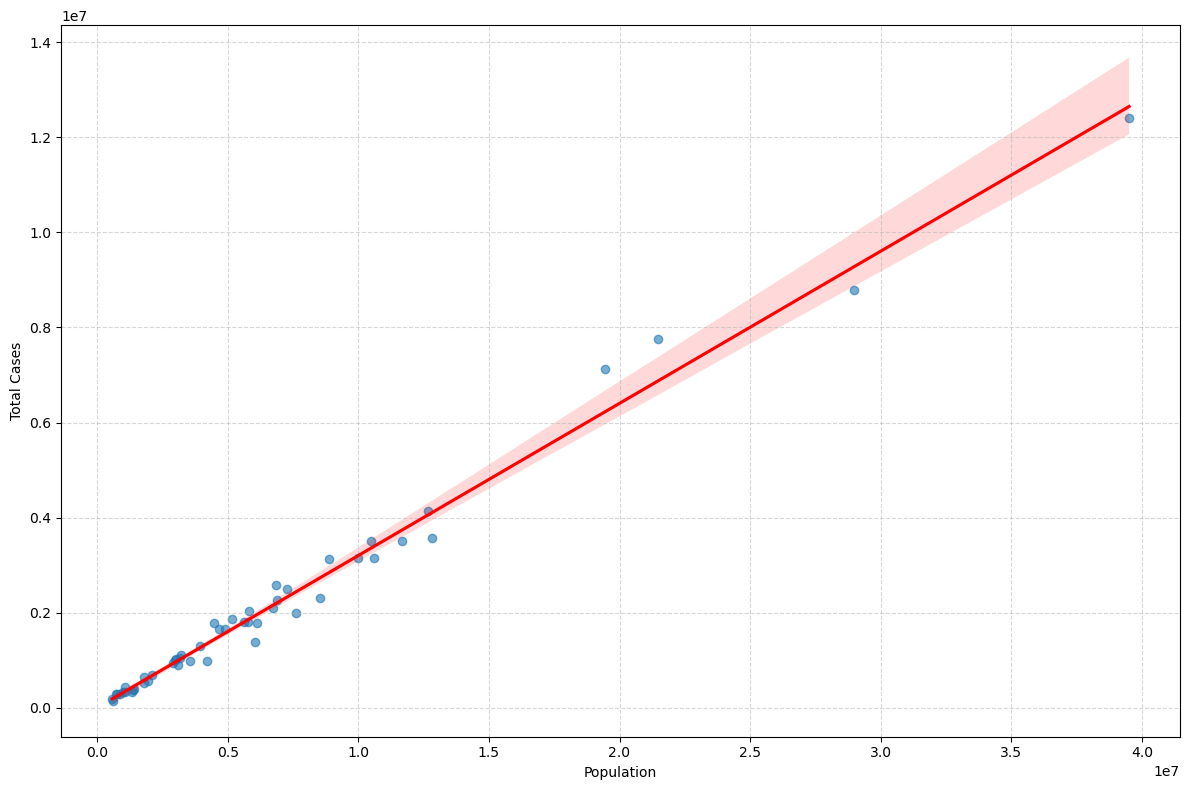

In [92]:
sns.regplot(
    data=df,
    x="Population",
    y="Total Cases",
    scatter_kws={'alpha':0.6},
    line_kws={"color":"red"}
)

plt.title = "Population Vs Total Cases in States"
plt.xlabel = "Population"
plt.ylabel = "Total Cases"
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Q8. How evenly distributed are testing resources across states relative to their population?

In [97]:
df.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate,active_case_rate,active_case_rate/1M,State Abbrev,death_case_ratio(%),Recovery Rate %
USA State,,,,,,,,,,,,,,,
Alabama,1659936,21138,1623935.0,14863.0,338542,4311,9332317,1903317,4903185,0.012734,0.043903,43902.972157,AL,1.273423,97.831181
Alaska,301513,1485,298902.0,1126.0,412159,2030,4790640,6548661,731545,0.004925,0.002732,2731.955386,AK,0.492516,99.134034
Arizona,2508168,33749,2461333.0,13086.0,344589,4637,22489035,3089698,7278717,0.013456,0.037976,37975.675370,AZ,1.345564,98.132701
Arkansas,1029976,13246,1012777.0,3953.0,341300,4389,8036831,2663139,3017804,0.012860,0.011582,11582.185760,AR,1.286049,98.330155
California,12393361,104634,12227662.0,61065.0,313659,2648,202799362,5132573,39512223,0.008443,0.194686,194685.948753,CA,0.844275,98.663002


In [98]:
df['Tests per Capita'] = df['Total Tests'] / df['Population']

In [99]:
df_sorted = df.sort_values('Tests per Capita', ascending=False)

In [100]:
df_sorted.head()

,Total Cases,Total Deaths,Total Recovered,Active Cases,Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/ 1M pop,Population,case_fatality_rate,active_case_rate,active_case_rate/1M,State Abbrev,death_case_ratio(%),Recovery Rate %,Tests per Capita
USA State,,,,,,,,,,,,,,,,
Rhode Island,443803,4166,439178.0,459.0,418935,3933,8808359,8314785,1059361,0.009387,0.001096,1095.635361,RI,0.938705,98.957871,8.314785
Massachusetts,2272428,24858,2241026.0,6544.0,329696,3607,50416970,7314755,6892503,0.010939,0.019849,19848.587790,MA,1.093896,98.618130,7.314755
New York,7122731,78103,7014253.0,30375.0,366140,4015,131503719,6759879,19453561,0.010965,0.082960,82960.069919,NY,1.096532,98.477017,6.759879
Vermont,154009,929,153011.0,69.0,246814,1489,4184358,6705820,623989,0.006032,0.000280,279.562748,VT,0.603212,99.351986,6.705820
Alaska,301513,1485,298902.0,1126.0,412159,2030,4790640,6548661,731545,0.004925,0.002732,2731.955386,AK,0.492516,99.134034,6.548661


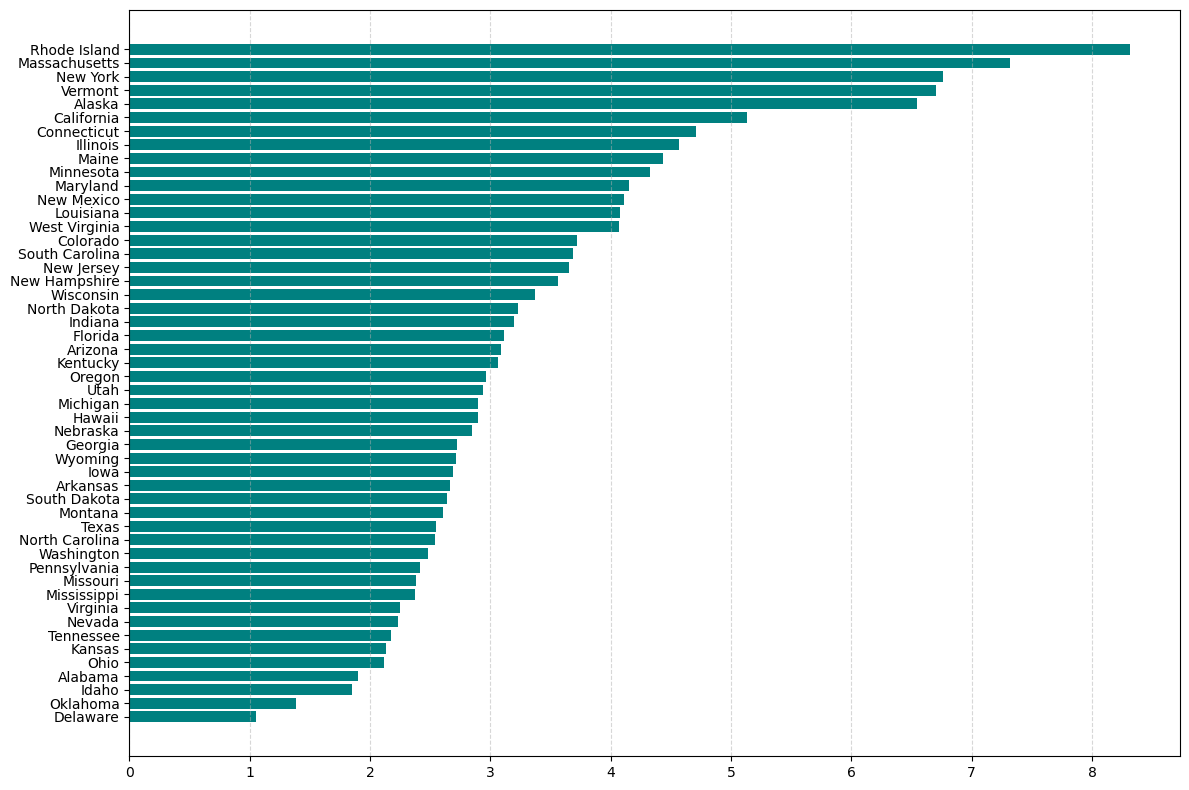

In [109]:
df_sorted=all_states=df_sorted
plt.barh(df_sorted.index, df_sorted['Tests per Capita'], color='teal')
plt.xlabel='Tests per Capita'
plt.title='States by COVID-19 Tests per Capita'
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


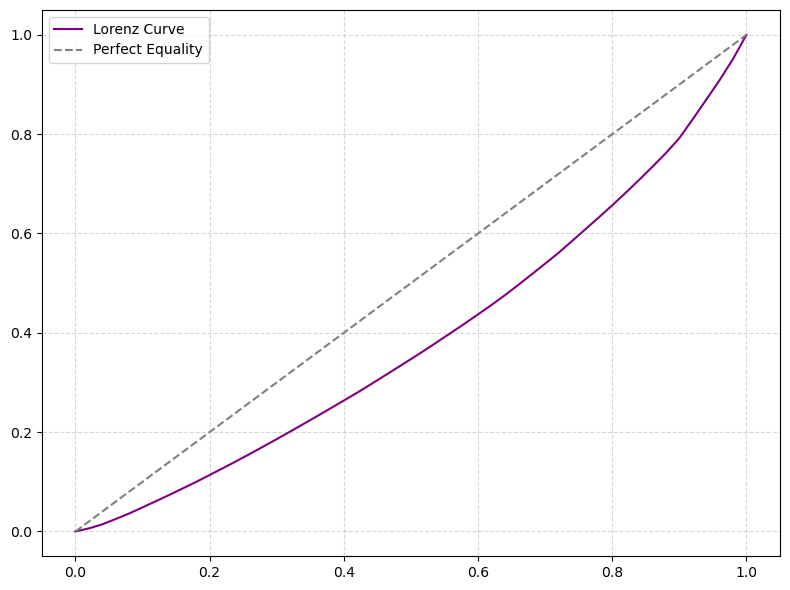

In [112]:
import matplotlib.pyplot as plt
import numpy as np

data = np.sort(df['Tests per Capita'].values)
n = len(data)
cumulative = np.cumsum(data) / np.sum(data)
cumulative = np.insert(cumulative, 0, 0)

plt.figure(figsize=(8, 6))
plt.plot(np.linspace(0.0, 1.0, len(cumulative)), cumulative, label='Lorenz Curve', color='purple')
plt.plot([0, 1], [0, 1], '--', label='Perfect Equality', color='gray')
plt.title= "Lorenz Curve of COVID-19 Testing per Capita by State"
plt.xlabel="Cumulative Share of States"
plt.ylabel='Cumulative Share of Tests'
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


#### Since the Lorenz curve bows away from the Perfect Equality Curve: a few states got much more testing per capita than others — showing testing inequality.